<a href="https://colab.research.google.com/github/ominivac/analise_integraSUS/blob/master/IntregraSUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import plotly
import numpy as np
import plotly.offline as py
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates


# Fonte dos dados : http://download-integrasus.saude.ce.gov.br/download

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/IntegraSUS/casos_coronavirus_2020_10_14.csv", low_memory=False, sep=';')

#quantidade de registros
df.shape

(1048272, 44)

In [4]:
# Preview dos dados 
df.head(3)

,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,evolucaoCaso,profissionalSaude
0,d353506ffd6965f71b842541a73e165c,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,38.0,NaN,28-07-2020,30-07-2020,28-07-2020,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,NaN,NaN,NaN,NaN,Ignorado,Não
1,3735c152b24447cd122a54d003d7cc60,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,47.0,NaN,28-07-2020,31-07-2020,28-07-2020,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,NaN,NaN,NaN,NaN,Ignorado,Não
2,6d7dbe442a64bb9b91e813c91d3e1d12,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,36.0,NaN,28-07-2020,31-07-2020,28-07-2020,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,NaN,NaN,NaN,NaN,Ignorado,Não


In [5]:
# Tranformar as col. de data no tipo certo
df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]] =  df[["dataNotificacao","dataSolicitacaoExame","dataResultadoExame","dataColetaExame","dataInicioSintomas", "dataObito", "dataNotificacaoObito"]].apply(pd.to_datetime,  errors='coerce')

In [6]:
# Alterar onde for nan para Não Informado
df['racaCorPaciente'] = df['racaCorPaciente'].fillna('Não Informado')

In [7]:
bins= [0,9,19,39,59,79,120]
labels = ['0-9','10-19','20-39','40-59','60-79','80E+']
df['faixaIdade'] = pd.cut(df['idadePaciente'], bins=bins, labels=labels)
df.head(3)

,codigoPaciente,paisPaciente,estadoPaciente,codigoMunicipioPaciente,municipioPaciente,bairroPaciente,sexoPaciente,idadePaciente,dataNotificacao,dataSolicitacaoExame,dataResultadoExame,dataColetaExame,resultadoFinalExame,obitoConfirmado,dataInicioSintomas,dataObito,idSivep,classificacaoEstadoSivep,dataInternacaoSivep,dataEntradaUtisSvep,dataSaidaUtisSvep,evolucaoCasoSivep,dataEvolucaoCasoSivep,comorbidadePuerperaSivep,comorbidadeCardiovascularSivep,comorbidadeHematologiaSivep,comorbidadeSindromeDownSivep,comorbidadeAsmaSivep,comorbidadeDiabetesSivep,comorbidadeNeurologiaSivep,comorbidadePneumopatiaSivep,comorbidadeImunodeficienciaSivep,comorbidadeRenalSivep,comorbidadeObesidadeSivep,comorbidadeHiv,comorbidadeNeoplasias,tipoObito,tipoTesteExame,racaCorPaciente,dataNotificacaoObito,cnesNotificacaoEsus,municipioNotificacaoEsus,evolucaoCaso,profissionalSaude,faixaIdade
0,d353506ffd6965f71b842541a73e165c,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,38.0,NaT,2020-07-28,2020-07-30,2020-07-28,Negativo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,Ignorado,Não,20-39
1,3735c152b24447cd122a54d003d7cc60,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,47.0,NaT,2020-07-28,2020-07-31,2020-07-28,Negativo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,Ignorado,Não,40-59
2,6d7dbe442a64bb9b91e813c91d3e1d12,BRASIL,CE,230440.0,FORTALEZA,NaN,FEMININO,36.0,NaT,2020-07-28,2020-07-31,2020-07-28,Negativo,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT PCR,Não Informado,NaT,NaN,NaN,Ignorado,Não,20-39


In [8]:
# Como cada dia representa um óbito, criar nova coluna para cada registro somente HUM por registro 
df['qtObito'] = np.where(df['obitoConfirmado'] == True, 1, 0)
#df[df['qtObito'] == 1].head(3)

In [9]:
# Nova coluna para somar de casos confirmados SEM óbito
df['qtCasoConfirmadoSemObito'] = np.where(  ( df['resultadoFinalExame'] == 'Positivo')  & (df['dataObito'].isnull() ) , 1, 0) 
#df[df['qtCasoConfirmadoSemObito'] == 1].head(3)

**gerar outro df com somente obitos para os graficos**

In [10]:
df_obitos = df[ df['obitoConfirmado'] == True]

copiar para outro df somente as colunas desejadas

In [11]:
selected_columns = df_obitos[["codigoPaciente","sexoPaciente", "idadePaciente", "dataObito","faixaIdade","qtObito","qtCasoConfirmadoSemObito"]]


new_df = selected_columns.copy()
new_df.head(3)

,codigoPaciente,sexoPaciente,idadePaciente,dataObito,faixaIdade,qtObito,qtCasoConfirmadoSemObito
9904,579907d7688be87c66eeea29031825ab,MASCULINO,50.0,2020-09-18,40-59,1,0
14509,0f6c0b6968f1b0558916fc396a2f2982,MASCULINO,86.0,2020-06-25,80E+,1,0
14510,b1a3bd29be2d4c7bc4bc7a9912734b75,MASCULINO,58.0,2020-01-06,40-59,1,0


In [12]:
new_df

,codigoPaciente,sexoPaciente,idadePaciente,dataObito,faixaIdade,qtObito,qtCasoConfirmadoSemObito
9904,579907d7688be87c66eeea29031825ab,MASCULINO,50.0,2020-09-18,40-59,1,0
14509,0f6c0b6968f1b0558916fc396a2f2982,MASCULINO,86.0,2020-06-25,80E+,1,0
14510,b1a3bd29be2d4c7bc4bc7a9912734b75,MASCULINO,58.0,2020-01-06,40-59,1,0
14511,24af77691774d176b20cd186cc606578,MASCULINO,45.0,2020-04-21,40-59,1,0
14514,bbb43fe4dab1a36b5ccda2da6297909e,FEMININO,66.0,2020-05-22,60-79,1,0
...,...,...,...,...,...,...,...
1040416,926f9792a70efd0ff41bdffc377d3024,MASCULINO,53.0,2020-06-27,40-59,1,0
1040419,b829dc271230dbffdc7c1a83582998b4,MASCULINO,50.0,2020-05-31,40-59,1,0
1040422,c85a350faa5669d8c7aa1b67a32a976c,MASCULINO,99.0,2020-03-07,80E+,1,0
1040424,f802f7ed9de677fac54bdff697940c3f,MASCULINO,87.0,2020-07-22,80E+,1,0


In [13]:
new_df.sort_values('dataObito')

,codigoPaciente,sexoPaciente,idadePaciente,dataObito,faixaIdade,qtObito,qtCasoConfirmadoSemObito
189104,29f801ba16767e9bd642e73776ba984d,FEMININO,76.0,2020-01-04,60-79,1,0
146051,9f62c6dfde5ca75c3b6d8ddc6a210e8a,FEMININO,86.0,2020-01-04,80E+,1,0
194728,119a6e1e477f25151fc85264b0e8fa20,FEMININO,52.0,2020-01-04,40-59,1,0
995448,813b172d7e33b0dfc7d3a21d1514cd16,MASCULINO,91.0,2020-01-04,80E+,1,0
803558,e834e1bb2845f95dc92ff62aefc252f6,MASCULINO,81.0,2020-01-05,80E+,1,0
...,...,...,...,...,...,...,...
1022565,9511b344856f32cc07adbb050d07b014,FEMININO,77.0,2020-12-10,60-79,1,0
540971,cd6174ea1c94fd6a7fdeff7a0a2d499b,MASCULINO,90.0,2020-12-10,80E+,1,0
539797,4eda8ddf480c1b0c48ed0f48358bd8be,MASCULINO,78.0,2020-12-10,60-79,1,0
195435,9f421728a4846b4f7ee72993887b1a4a,MASCULINO,NaN,2020-12-10,NaN,1,0


In [14]:
g1 = new_df.groupby( [ "dataObito"] ).count()

In [15]:
g1

,codigoPaciente,sexoPaciente,idadePaciente,faixaIdade,qtObito,qtCasoConfirmadoSemObito
dataObito,,,,,,
2020-01-04,4,4,4,4,4,4
2020-01-05,90,90,90,90,90,90
2020-01-06,97,97,97,96,97,97
2020-01-07,49,49,49,49,49,49
2020-01-08,27,27,26,26,27,27
...,...,...,...,...,...,...
2020-12-06,62,62,62,62,62,62
2020-12-07,44,44,44,44,44,44
2020-12-08,25,25,25,24,25,25


In [16]:
g1 = g1.reset_index(drop=False)

In [17]:
g1

,dataObito,codigoPaciente,sexoPaciente,idadePaciente,faixaIdade,qtObito,qtCasoConfirmadoSemObito
0,2020-01-04,4,4,4,4,4,4
1,2020-01-05,90,90,90,90,90,90
2,2020-01-06,97,97,97,96,97,97
3,2020-01-07,49,49,49,49,49,49
4,2020-01-08,27,27,26,26,27,27
...,...,...,...,...,...,...,...
199,2020-12-06,62,62,62,62,62,62
200,2020-12-07,44,44,44,44,44,44
201,2020-12-08,25,25,25,24,25,25
202,2020-12-09,16,16,16,16,16,16


In [18]:
g1.drop(columns=['codigoPaciente', 'sexoPaciente','idadePaciente','faixaIdade','qtCasoConfirmadoSemObito'], inplace= True)

In [19]:
g1.head(5)

,dataObito,qtObito
0,2020-01-04,4
1,2020-01-05,90
2,2020-01-06,97
3,2020-01-07,49
4,2020-01-08,27


**gerar media movel de 7 dias**

In [20]:
#g1['MA7'] = g1.loc['qtObito'].rolling(window=7).mean()
g1['MA7'] = g1.qtObito.rolling(window=7).mean()

In [21]:
g1

,dataObito,qtObito,MA7
0,2020-01-04,4,NaN
1,2020-01-05,90,NaN
2,2020-01-06,97,NaN
3,2020-01-07,49,NaN
4,2020-01-08,27,NaN
...,...,...,...
199,2020-12-06,62,43.571429
200,2020-12-07,44,44.000000
201,2020-12-08,25,44.285714
202,2020-12-09,16,43.857143


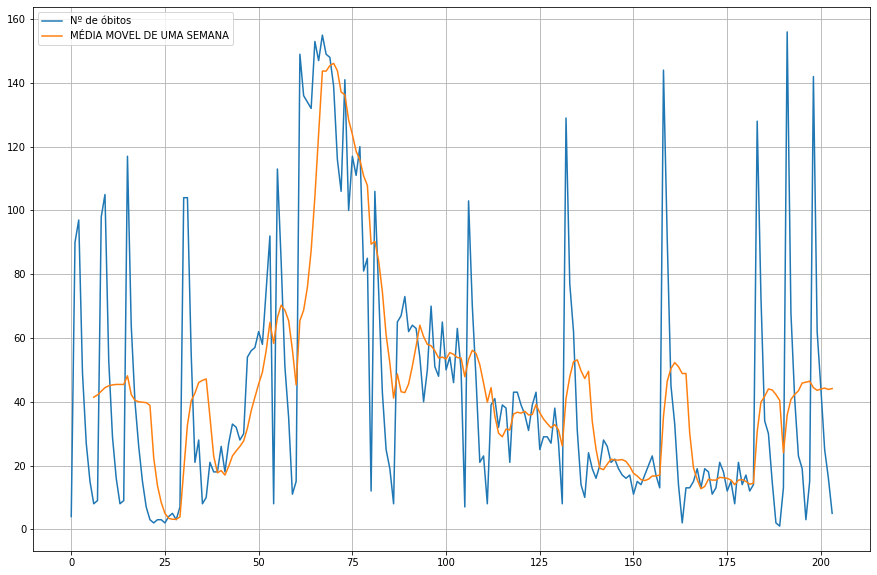

In [23]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(g1['qtObito'],label='Nº de óbitos')
plt.plot(g1['MA7'],label='MÉDIA MOVEL DE UMA SEMANA')

plt.legend(loc=2)